<a href="https://colab.research.google.com/github/malcolmrite-dsi/WSB_Stock_Screener/blob/main/Reddit_Stock_Scanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [ ]:
!pip install praw

Reference: https://www.storybench.org/how-to-scrape-reddit-with-python/



*   PRAW:  Python Reddit API Wrapper, allows easy access to Reddit Data
*   Pandas: To handle the data from the scraping in well formatted tables
*   datetime: To convert the raw date format into an understandable format



In [15]:
import praw
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt


# Getting the Data from Reddit

Function Definitions









In [4]:
def authorise_extractor(twofactorcode):
    #Initialising the credentials for the API
    reddit = praw.Reddit(client_id='1h1Pkh53dcBSLA', \
                             client_secret='Lm4-BO2A5GpHoYnzEUEMMLOoH1TpIw', \
                             user_agent='Reddit_Stock by u/Get_Rich_Bot', \
                             username='Get_Rich_Bot', \
                             password= f'B+4H-5yww=<QJUV:{twofactorcode}')
    return reddit
    
    
def test_extractor(self):
    #Testing if the authorisation worked
    #For Reference: https://praw.readthedocs.io/en/latest/getting_started/quick_start.html
    print(self.read_only)
    
    # assume you have a reddit instance bound to variable `reddit`
    #Setting the subreddit to wallstreetbets
    subreddit = self.subreddit("wallstreetbets")
    
    #Validate that the subreddit extractor is working
    print(subreddit.display_name)
    print(subreddit.title)
    print(self.user.me())
    
    #Getting example submissions from the subreddit
    for submission in subreddit.top(limit=15):
        print(submission.title)  # Output: the submission's title
        print(submission.score)  # Output: the submission's score
        print(submission.id)     # Output: the submission's ID
        print(submission.url)    # Output: the URL the submission points to
                                # or the submission's URL if it's a self post

#For Reference: https://www.storybench.org/how-to-scrape-reddit-with-python/
def get_date(created):
        return dt.datetime.fromtimestamp(created)
    
#Returns a dataframe of the top reddit posts from WSB
def extract_top_data(self, posts):
    #Setting the subreddit to wallstreetbets
    subreddit = self.subreddit("wallstreetbets")
    #Create a dictionary to store the data   
                                
    topics_dict = { "title":[], \
                    "score":[], \
                    "id":[], \
                    "url":[], \
                    "comms_num": [], \
                    "created": [], \
                    "body":[]}
    
    #Extract the top posts with an upper limit defined by the user
    top_subreddit = subreddit.top(limit=posts)
    
    #Extract the relevant data from the subreddit
    for submission in top_subreddit:
        topics_dict["title"].append(submission.title)
        topics_dict["score"].append(submission.score)
        topics_dict["id"].append(submission.id)
        topics_dict["url"].append(submission.url)
        topics_dict["comms_num"].append(submission.num_comments)
        topics_dict["created"].append(submission.created)
        topics_dict["body"].append(submission.selftext)
        
    topics_data = pd.DataFrame(topics_dict)
    
    _timestamp = topics_data["created"].apply(get_date)
    topics_data = topics_data.assign(timestamp = _timestamp)

    return topics_data

## Officially Getting the Data

In [7]:
reddit = authorise_extractor("668891")

train_data = extract_top_data(reddit, 100)

print(train_data.head())

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                               title  ...           timestamp
0                             Times Square right now  ... 2021-01-31 02:00:38
1             UPVOTE so everyone sees we got SUPPORT  ... 2021-01-28 21:40:34
2                      GME YOLO update — Jan 28 2021  ... 2021-01-29 05:06:23
3               GME YOLO month-end update — Jan 2021  ... 2021-01-30 05:04:45
4  CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...  ... 2021-01-28 21:49:11

[5 rows x 8 columns]


In [8]:
train_data

,title,score,id,url,comms_num,created,body,timestamp
0,Times Square right now,369934,l8rf4k,https://v.redd.it/x64z70f7eie61,11909,1.612058e+09,,2021-01-31 02:00:38
1,UPVOTE so everyone sees we got SUPPORT,300110,l6wu59,https://i.redd.it/sgoqy8nyt2e61.png,12758,1.611870e+09,,2021-01-28 21:40:34
2,GME YOLO update — Jan 28 2021,268358,l78uct,https://i.redd.it/opzucppb15e61.png,24185,1.611897e+09,,2021-01-29 05:06:23
3,GME YOLO month-end update — Jan 2021,242248,l846a1,https://i.redd.it/r557em3t5ce61.png,21026,1.611983e+09,,2021-01-30 05:04:45
4,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,217050,l6x130,https://www.reddit.com/r/wallstreetbets/commen...,18548,1.611871e+09,LEAVE ROBINHOOD. They dont deserve to make mon...,2021-01-28 21:49:11
...,...,...,...,...,...,...,...,...
95,"Ethan Klein (h3h3 podcast) joins the battle, t...",91332,l7oq0j,https://i.redd.it/l4n7bnp0u8e61.jpg,2084,1.611943e+09,,2021-01-29 17:51:16
96,Spread the word! 💎🤲,90471,l9teai,https://i.redd.it/fk8im2cz9se61.jpg,1143,1.612178e+09,,2021-02-01 11:14:44
97,This money is life changing to me. I could hav...,90286,l81n6g,https://i.redd.it/y1h3rcszobe61.jpg,3420,1.611977e+09,,2021-01-30 03:28:26
98,GME YOLO update — Jan 22 2021,89096,l2x7he,https://i.redd.it/xho46kzt7yc61.png,6419,1.611379e+09,,2021-01-23 05:14:08


# Data Analysis

In [9]:
train_data.describe()

,score,comms_num,created
count,100.000000,100.000000,1.000000e+02
mean,137572.170000,6067.560000,1.612029e+09
std,47439.379983,5547.002123,2.011020e+05
min,88905.000000,1048.000000,1.611379e+09
25%,102869.750000,2645.750000,1.611887e+09
50%,127069.500000,4594.500000,1.611972e+09
75%,155310.250000,6703.250000,1.612207e+09
max,369934.000000,28801.000000,1.612525e+09


In [13]:
train_data.dtypes

title                object
score                 int64
id                   object
url                  object
comms_num             int64
created             float64
body                 object
timestamp    datetime64[ns]
dtype: object

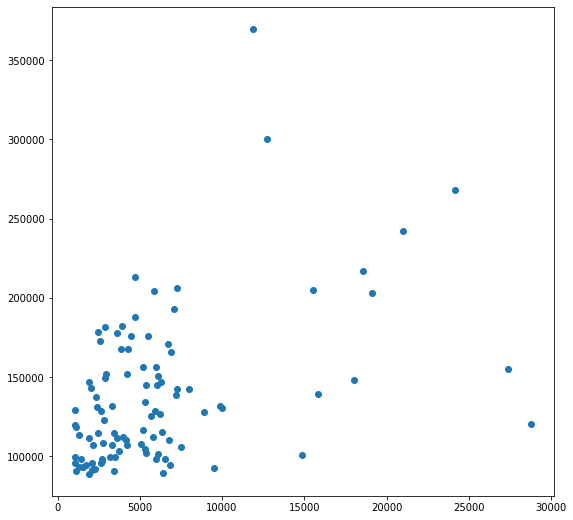

In [25]:
plt.figure(figsize=(9,9))
plt.scatter(train_data.comms_num, train_data.score)
plt.show()